<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/Pre_Process_OHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [ ]:
#1
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


In [ ]:
#2
print('O dataframe contem : ',df.shape[0],' linhas e',df.shape[1],' colunas')

O dataframe contem :  29170  linhas e 9  colunas


In [ ]:
#3
print(df.dtypes)
df.describe()

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object


,idade,tempo_educacao,horas_por_semana,nome,dívida
count,29071.000000,29170.000000,29170.000000,0.0,0.0
mean,38.654088,10.169455,40.447755,NaN,NaN
std,13.720345,2.394966,12.417203,NaN,NaN
min,17.000000,1.000000,1.000000,NaN,NaN
25%,28.000000,9.000000,40.000000,NaN,NaN
50%,37.000000,10.000000,40.000000,NaN,NaN
75%,48.000000,12.000000,45.000000,NaN,NaN
max,90.000000,16.000000,99.000000,NaN,NaN


In [ ]:
#4
df.isnull().sum()

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [ ]:
# temos dados faltantes nas colunas 'idade','nome' e 'dívida'

In [ ]:
#5
df.estado_civil.value_counts()

Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [ ]:
df.cor.value_counts()

White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: cor, dtype: int64

In [ ]:
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

In [ ]:
# na variável sexo, temos 1937 registros  com ?. Ou seja, sem a informação do sexo.

In [ ]:
#6
media_idade = df.idade.mean()
df.idade.fillna(media_idade, inplace=True)

In [ ]:
moda_variavel_sexo = df.sexo.value_counts().idxmax()
moda_variavel_sexo

'Male'

In [ ]:
df['sexo'] = df['sexo'].str.replace('?',moda_variavel_sexo)

C:\Users\guilh\AppData\Local\Temp\ipykernel_6640\867686803.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sexo'] = df['sexo'].str.replace('?',moda_variavel_sexo)


In [ ]:
df.sexo.value_counts()

Male      20118
Female     9052
Name: sexo, dtype: int64

In [ ]:
#como as colunas 'nome' e 'dívida' não possuem nenhum registro a ser considerado, vamos dropar as duas colunas

In [ ]:
df.drop(['nome','dívida'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64

In [ ]:
#7 Aplique uma transformação "MinMax" na variável 'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [ ]:
X = df.tempo_educacao.values.reshape(-1,1)
W = df.horas_por_semana.values.reshape(-1,1)
mm_scaler.fit(X)
ss_scaler.fit(W)

StandardScaler()

In [ ]:
mm_scaler.transform(X)

array([[0.8       ],
       [0.8       ],
       [0.53333333],
       ...,
       [0.53333333],
       [0.53333333],
       [0.53333333]])

In [ ]:
ss_scaler.transform(W)

array([[-0.03605983],
       [-2.21049975],
       [-0.03605983],
       ...,
       [-0.03605983],
       [-1.64675606],
       [-0.03605983]])

In [ ]:
#8 Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.
from sklearn.preprocessing import OneHotEncoder
ohe1 = OneHotEncoder()
ohe2 = OneHotEncoder()
ohe3 = OneHotEncoder()

In [ ]:
estado_civil_ohe = df.estado_civil.values.reshape(-1,1)
ohe1.fit(estado_civil_ohe)

OneHotEncoder()

In [ ]:
cor_ohe = df.cor.values.reshape(-1,1)
ohe2.fit(cor_ohe)

OneHotEncoder()

In [ ]:
sexo_ohe = df.sexo.values.reshape(-1,1)
ohe3.fit(sexo_ohe)

OneHotEncoder()

In [ ]:
ohe1.transform(estado_civil_ohe).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
ohe2.transform(cor_ohe).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
ohe3.transform(sexo_ohe).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

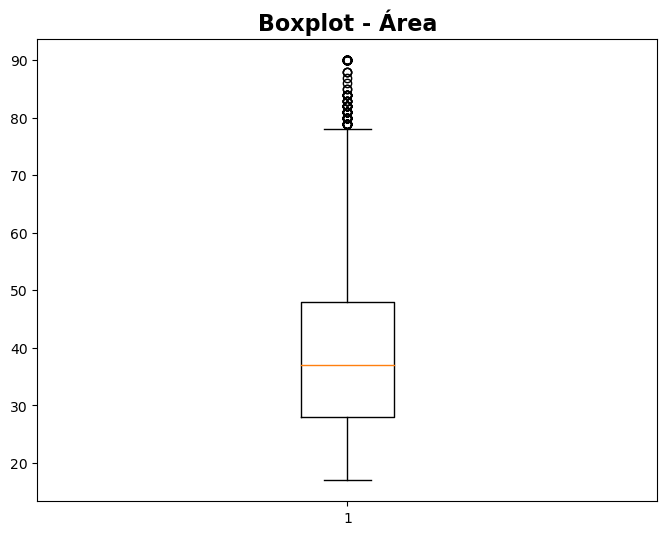

In [ ]:
#9 Detecte e elimine os outliers da variável 'idade'.
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.title("Boxplot - Área", fontsize = 16, fontweight = 'bold')
plt.boxplot(df.idade)
plt.show()

In [ ]:
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [ ]:
df['outlier_idade'] = detecta_outlier(df.idade)
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [ ]:
df.loc[(df.outlier_idade==1)]

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
61,79.0,10,Married-civ-spouse,White,Male,20,<=50K,1
193,90.0,9,Never-married,Black,Male,40,<=50K,1
380,80.0,9,Widowed,White,Male,24,<=50K,1
826,81.0,9,Married-civ-spouse,White,Male,30,<=50K,1
936,90.0,9,Never-married,White,Female,40,<=50K,1
...,...,...,...,...,...,...,...,...
28517,80.0,12,Married-civ-spouse,White,Male,4,<=50K,1
28535,82.0,9,Married-civ-spouse,White,Male,20,<=50K,1
28920,90.0,9,Widowed,White,Female,25,<=50K,1
28996,90.0,4,Married-civ-spouse,White,Male,40,<=50K,1


In [ ]:
df.loc[(df.outlier_idade==1)].min()

idade                             79.0
tempo_educacao                       2
estado_civil                  Divorced
cor                 Amer-Indian-Eskimo
sexo                            Female
horas_por_semana                     2
salario_anual                    <=50K
outlier_idade                        1
dtype: object

In [ ]:
list_index = df.loc[(df.outlier_idade==1)].index.tolist()

In [ ]:
list_index

[61,
 193,
 380,
 826,
 936,
 1047,
 1747,
 2076,
 2474,
 2609,
 2884,
 2995,
 3169,
 3384,
 3554,
 3649,
 3684,
 4216,
 4311,
 4559,
 4709,
 4726,
 4797,
 4828,
 5361,
 5552,
 5569,
 5752,
 5915,
 6029,
 6682,
 6899,
 7029,
 7296,
 7485,
 7533,
 7616,
 7774,
 7882,
 8022,
 8032,
 9046,
 9123,
 9929,
 10057,
 10296,
 10316,
 10496,
 10739,
 11179,
 11613,
 11658,
 11659,
 12617,
 13052,
 13150,
 13194,
 13329,
 13732,
 14009,
 14578,
 14774,
 14996,
 15124,
 15765,
 16137,
 16230,
 16349,
 16481,
 16605,
 16755,
 16854,
 17043,
 17154,
 17161,
 17189,
 17441,
 17445,
 17461,
 17621,
 17671,
 17747,
 18141,
 18291,
 18328,
 18344,
 18345,
 18458,
 18655,
 18706,
 19127,
 19272,
 19553,
 19572,
 19919,
 20147,
 20508,
 20510,
 21021,
 21418,
 21533,
 21547,
 21728,
 21767,
 21875,
 22029,
 22693,
 22770,
 23318,
 23531,
 23963,
 24910,
 25258,
 25510,
 25726,
 25923,
 26620,
 27797,
 28151,
 28390,
 28497,
 28517,
 28535,
 28920,
 28996,
 29109]

In [ ]:
for v in list_index:
    df.drop(v, axis=0, inplace=True)


In [ ]:
df.loc[(df.outlier_idade==1)]

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade


In [ ]:
#10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado,
#após todas as transformações dos itens acima.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def func (csv, cols_numericas, cols_categoricas):
    df = pd.read_csv(csv)
    dff = df.copy()
    print('O Dataframe contem : ',dff.shape[0],' linhas e',dff.shape[1],' colunas')
    print('O Dataframe contem as seguintes variáveis e tipos:\n',dff.dtypes)
    print('Verificando se o Dataframe contem valores nulos:\n',dff.isnull().sum())

    temp = (df.isnull().sum() / df.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes:
        dff = dff.drop(v, axis = 1)

    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))

    for v in cols_numericas:
        dff[v] = dff[v].fillna(dff[v].mean())

    for v in cols_categoricas:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)

    moda_variavel_sexo = dff.sexo.value_counts().idxmax()
    dff['sexo'] = dff['sexo'].str.replace('?',moda_variavel_sexo)

    mm_scaler = MinMaxScaler()
    ss_scaler = StandardScaler()
    X = dff.tempo_educacao.values.reshape(-1,1)
    W = dff.horas_por_semana.values.reshape(-1,1)
    mm_scaler.fit(X)
    ss_scaler.fit(W)
    mm_scaler.transform(X)
    ss_scaler.transform(W)

    print('Verificando se o Dataframe contem valores nulos:\n',dff.isnull().sum())

    ohe = OneHotEncoder()
    for i in cols_categoricas:
        variavel_ohe = dff[i].values.reshape(-1,1)
        ohe.fit(variavel_ohe)
        dataframe_OHE = pd.DataFrame(ohe.transform(variavel_ohe).toarray(),
                             columns = ohe.categories_[0].tolist())
        dff = pd.concat([dff, dataframe_OHE], axis = 1)

    outlier = dff.idade
    iqr = np.percentile(outlier, 75) - np.percentile(outlier, 25)
    limite_inf = np.maximum(np.percentile(outlier, 25) - 1.5 * iqr, np.min(outlier))
    limite_sup = np.minimum(np.percentile(outlier, 75) + 1.5 * iqr, np.max(outlier))
    dff['outlier_idade'] = np.where((outlier < limite_inf) | (outlier > limite_sup), 1, 0)
    list_index = df.loc[(dff.outlier_idade==1)].index.tolist()
    for v in list_index:
        dff.drop(v, axis=0, inplace=True)

    return dff



In [ ]:
func(csv = "dataframe_exercicio_modulo_7.csv",
     cols_numericas = ['idade', 'tempo_educacao', 'horas_por_semana'],
     cols_categoricas = ['estado_civil', 'cor', 'sexo'])

O Dataframe contem :  29170  linhas e 9  colunas
O Dataframe contem as seguintes variáveis e tipos:
 idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object
Verificando se o Dataframe contem valores nulos:
 idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64
Verificando se o Dataframe contem valores nulos:
 idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64


,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Separated,Widowed,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
